# Time Series Analysis and Forecasting using ARIMA class models
* A time series is a series of data points indexed (or listed or graphed) in time order. Most     commonly, a time series is a sequence taken at successive equally spaced points in time. Thus   it is a sequence of discrete-time data.

## Data set Description:
- Total monthly scripts for pharmaceutical products falling under ATC code A10, as recorded by the Australian Health Insurance Commission.
- The data is July-1991 to June-2008 and is recorded monthly.

In [1]:
#importing the required pakages
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid',context='notebook',color_codes=True)
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AusAntidiabeticDrug.csv')

## Exploring the data

In [3]:
df.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      204 non-null    object 
 1   y       204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [5]:
df.describe()

,y
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


In [6]:
df.y.unique

<bound method Series.unique of 0       3.526591
1       3.180891
2       3.252221
3       3.611003
4       3.565869
         ...    
199    21.654285
200    18.264945
201    23.107677
202    22.912510
203    19.431740
Name: y, Length: 204, dtype: float64>

In [7]:
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

## Time Plot
* Plot ,time vs variable we need to predict.
* Used to visualize the pattern (trend and seasonality) in the data.
* Aggregate data to weeks, months, quarters, years and visualize to better detect patterns 
* Zoom to specific locations inside the data to have a better view of the data

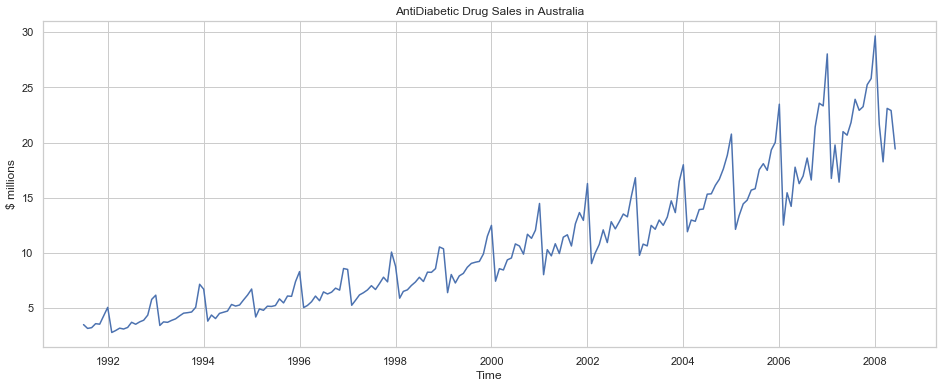

In [9]:
plt.figure(figsize=(16, 6))
plt.plot(df["ds"], df["y"])
plt.xlabel("Time")
plt.ylabel("$ millions")
plt.title("AntiDiabetic Drug Sales in Australia")
plt.show()

* There is a clear and increasing trend.
* There is also a seasonal pattern. 

In [10]:
df["year"] = df["ds"].dt.year
df["month"] = df["ds"].dt.strftime('%b')
df.head()

,ds,y,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


# # Stacked Line Chart

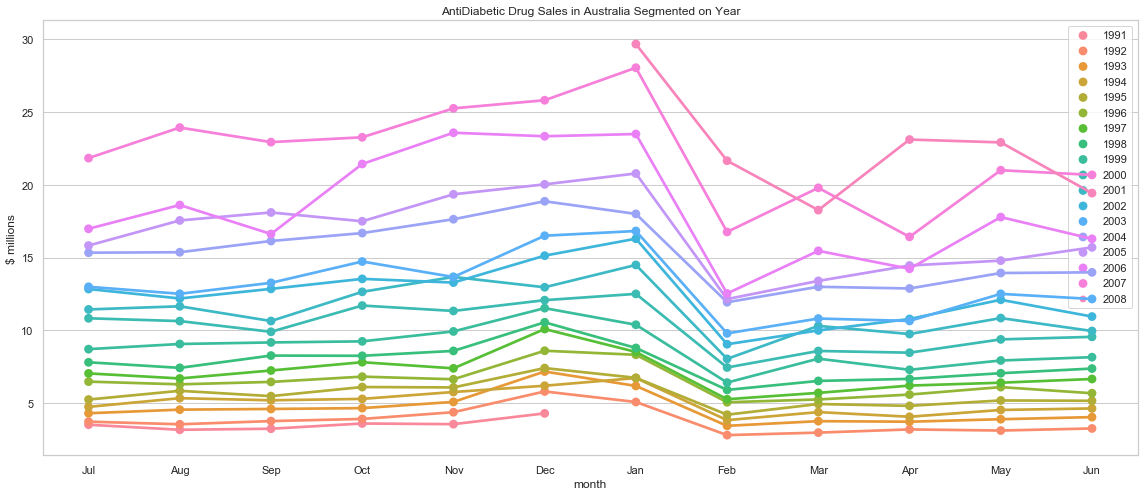

In [11]:
plt.figure(figsize=(16, 7))
sns.pointplot(x='month',y='y',hue='year',data=df)
plt.xlabel("month")
plt.ylabel("$ millions")
plt.title("AntiDiabetic Drug Sales in Australia Segmented on Year")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

- There is a large jump in sales in January each year. 

## Box Plot

<Figure size 1152x504 with 0 Axes>

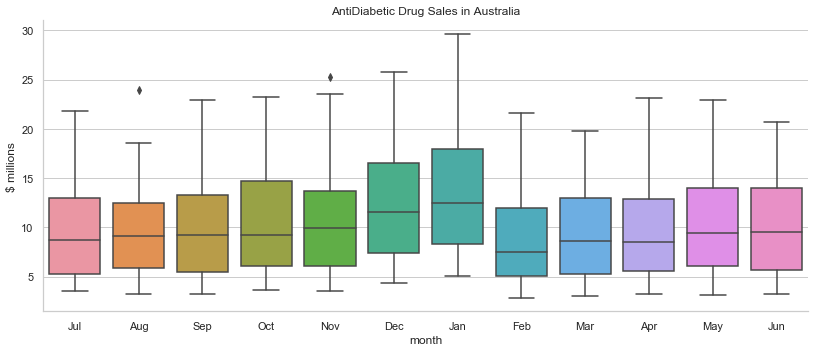

In [12]:
plt.figure(figsize=(16,7))
sns.factorplot(x="month", y="y", data=df, kind="box",size=5, aspect=float(16/7))
plt.xlabel("month")
plt.ylabel("$ millions")
plt.title("AntiDiabetic Drug Sales in Australia")
plt.tight_layout()
plt.show()

## LAGPLOTS
- A lag plot checks whether a data set or time series is random or not. 
- Random data should not exhibit any identifiable structure in the lag plot. 
- Non-random structure in the lag plot indicates that the underlying data is not random

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

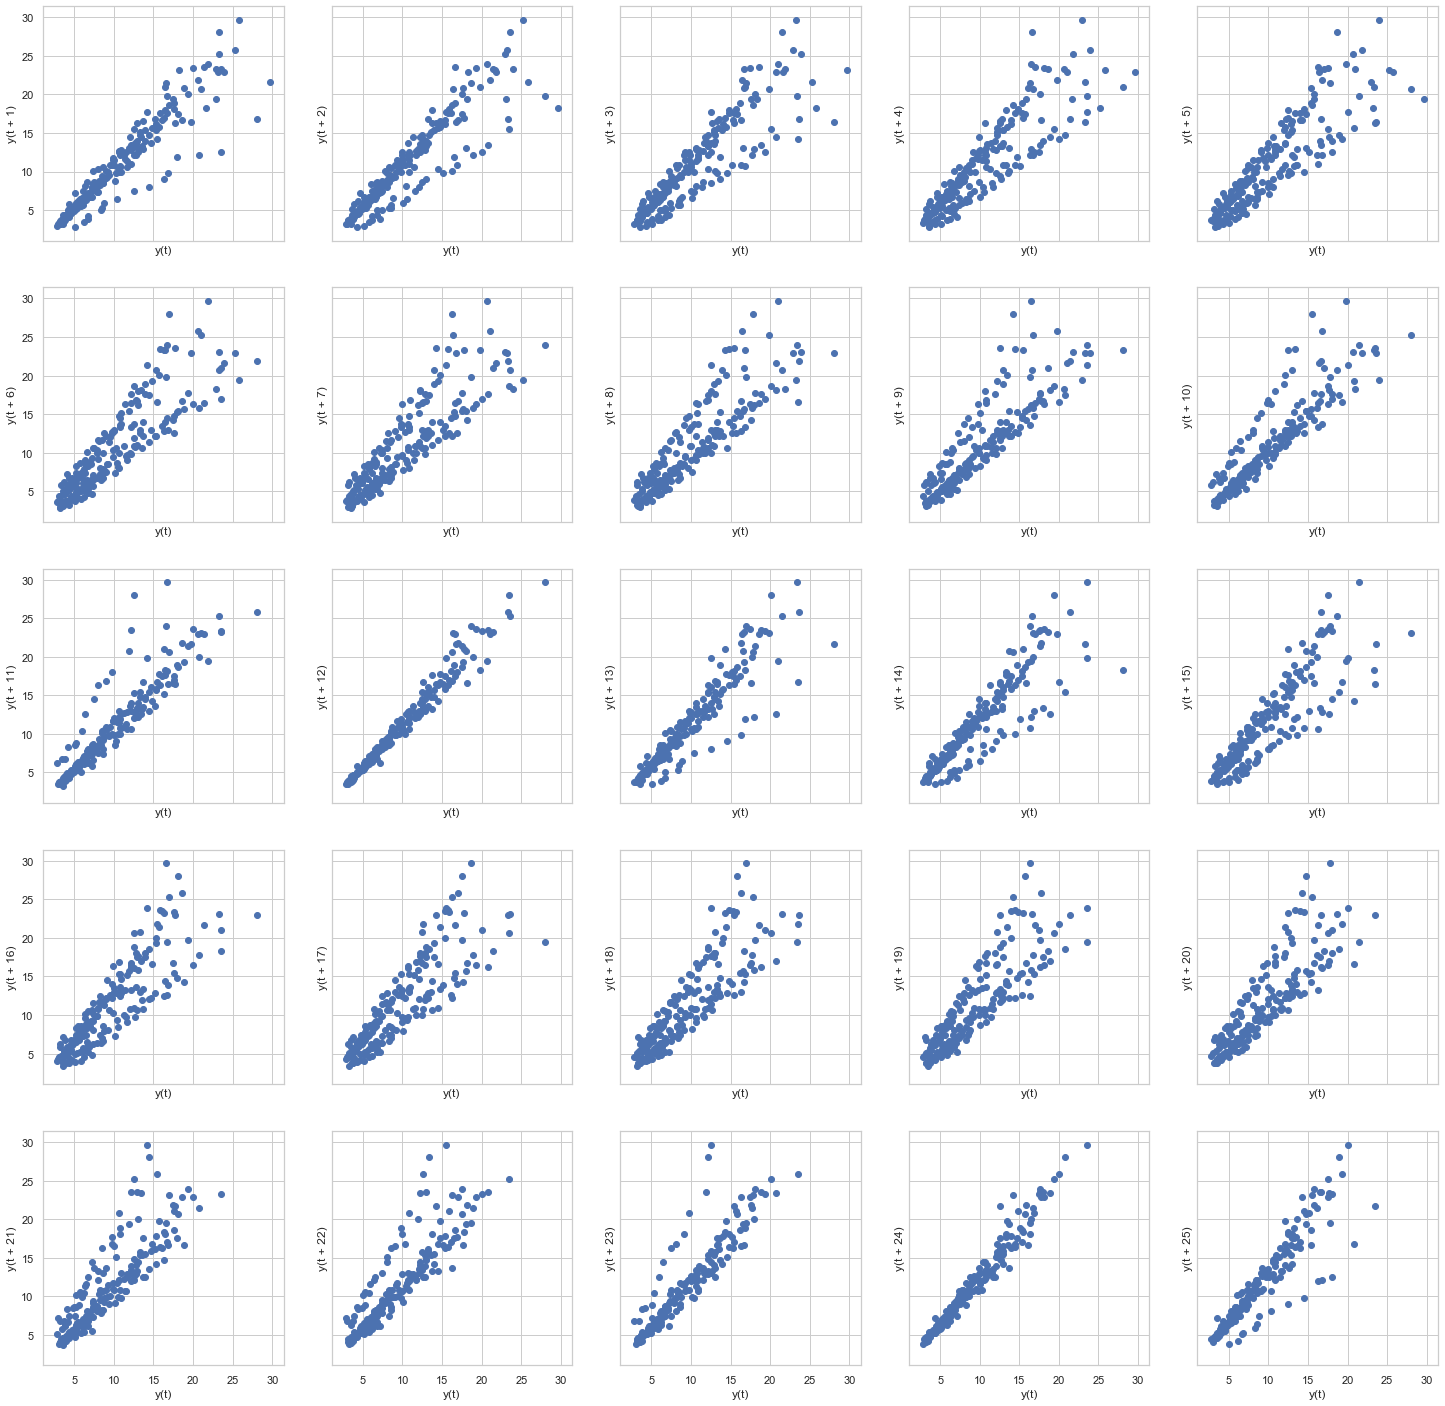

In [13]:
from pandas.plotting import lag_plot
plot_lags = 25
fig, axes = plt.subplots(5,5, sharex=True, sharey=True)
fig.set_figwidth(25)
fig.set_figheight(25)
count =1
for i in range(5):
    for j in range(5):
        lag_plot(df["y"], lag=count, ax=axes[i, j])
        count+=1

## AutoCorrelation in Data 
- An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other.
- Similar to lagplots but Quatifies(correlation) each lagplot shown above and present all of them in one single plot. 

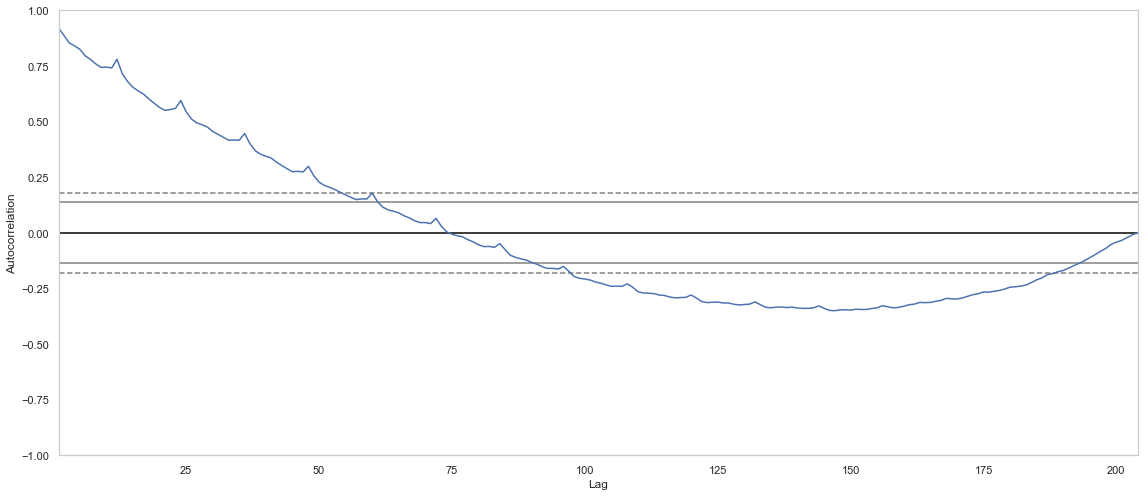

In [14]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(16, 7))
autocorrelation_plot(df["y"])
plt.tight_layout()
plt.show()

## Decomposing this time series data in Trend, Seasonality and Residuals

**Time Series Decomposing is simply decomposing this irregular pattern into regular pattern and modelling these individual patterns.**
* Trend –  overall direction of the series i.e. upwards, downwards etc.
* Seasonality – monthly or quarterly patterns
* Cycle –  long-term business cycles
* Irregular remainder – random noise left after extraction of all the components 

In [15]:
decompose = df[["ds", "y"]]
decompose.index = df["ds"]
decompose = decompose[["y"]]
decompose.head()

,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


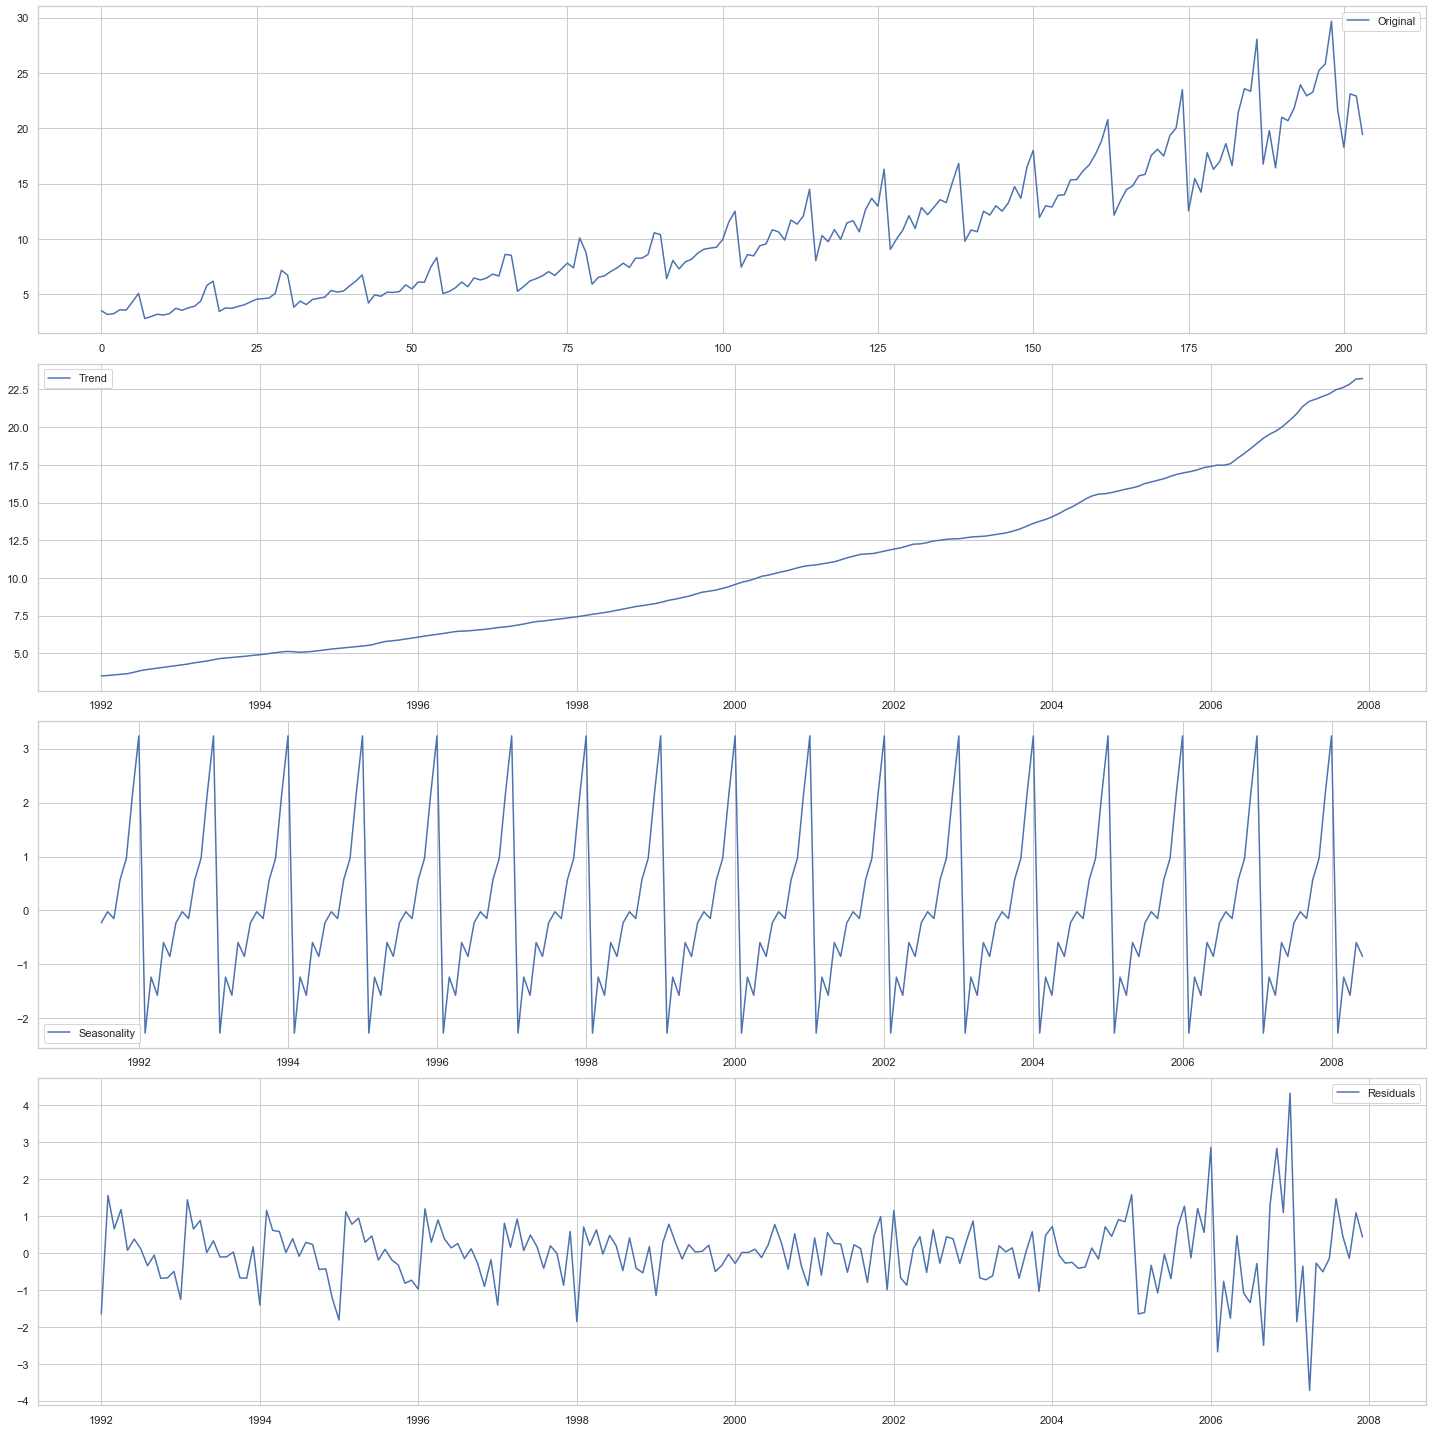

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(decompose)


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(20,20))
plt.subplot(411)
plt.plot(df["y"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Preparing the data for ARIMA class model by removing trend and seasonality as these model are built assuming data is stationary

* A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary.
* A white noise series is stationary,it does not matter when you observe it, it should look much the same at any point in time.

In [17]:
import datetime
from sklearn.metrics import mean_squared_error

In [18]:
x_train = decompose[decompose.index <datetime.datetime(2005, 1, 1, 0, 0, 0)]
x_test = decompose[decompose.index >=datetime.datetime(2005, 1, 1, 0, 0, 0)]

* Computing the difference between consecutive numbers is called differencing.
* Transformations such as logarithms can help to stabilize the variance of a time series. 
* Differencing can help stabilize the mean of a time series by removing changes in the level of   a time series, and therefore eliminating (or reducing) trend and seasonality.

* Visualizing Stationarity is a mess. Statisitcal tests Comes as saviours


## Augmented Dickey-Fuller (ADF) test:

* Null Hypothesis: data is non-stationary
* large p-values are indicative of non-stationarity, and small p-values suggest stationarity.     Using the usual 5% threshold, differencing is required if the p-value is greater than 0.05.


* First checking stationarity and then will decide which steps needed in order to make data stationary

In [19]:
from statsmodels.tsa.stattools import adfuller

# making function to check stationarity

def stationarity_test(data):
    dftest = adfuller(data.y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    plt.figure(figsize=(16, 7))
    plt.plot(data.index, data.y)
    plt.show()

Test Statistic                   2.228300
p-value                          0.998905
#Lags Used                      14.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64


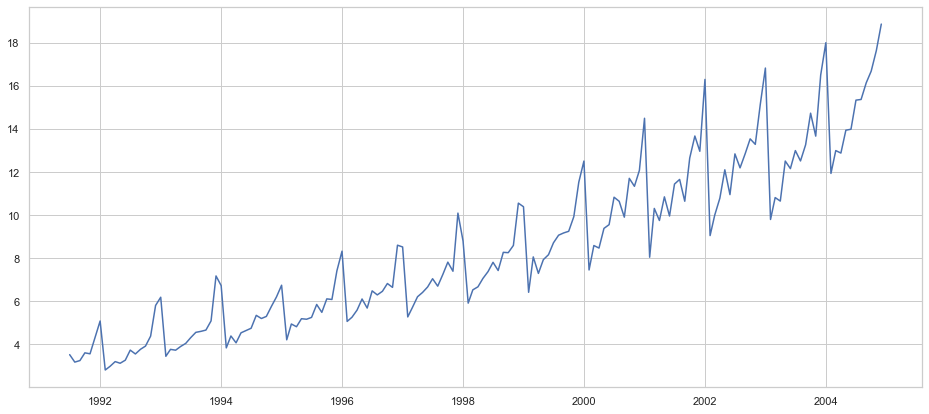

In [20]:
stationarity_test(x_train)

- The data is highly non-stationary. 
- We need to apply log-transformations to make variance constant

Test Statistic                  -0.660497
p-value                          0.856718
#Lags Used                      14.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64


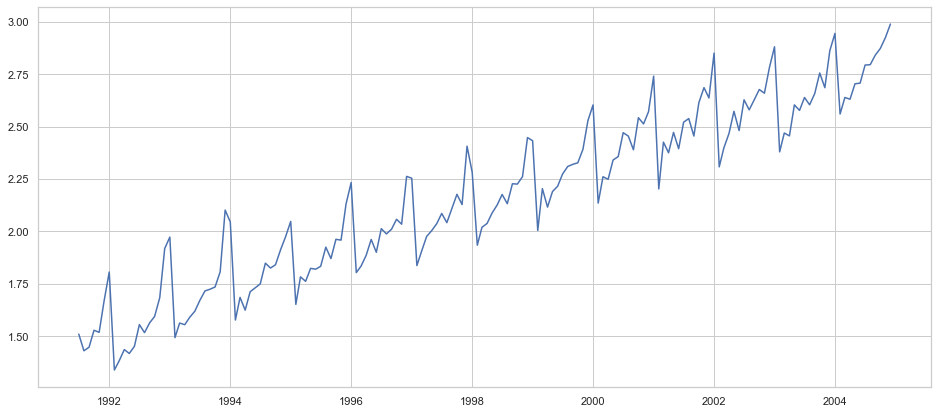

In [21]:
## Now take the log (To make variance constant) and check for stationary again 
import math
log_train = x_train
log_train = log_train["y"].apply(lambda x: math.log(x+1))
log_train = pd.DataFrame(log_train)
stationarity_test(log_train)

- The data is still highly non-stationary. But the variance became constant.

Test Statistic                  -4.034900
p-value                          0.001238
#Lags Used                      13.000000
Number of Observations Used    148.000000
Critical Value (1%)             -3.475325
Critical Value (5%)             -2.881275
Critical Value (10%)            -2.577293
dtype: float64


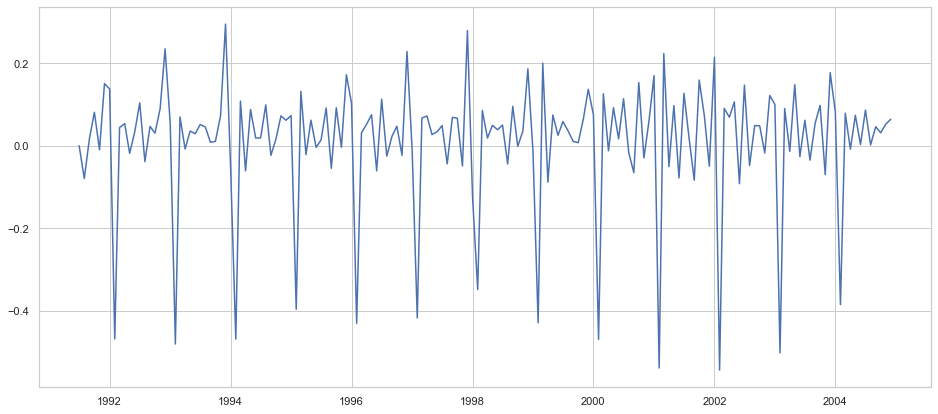

In [22]:
first_diff = log_train["y"] - log_train["y"].shift(1)
first_diff = first_diff.fillna(0)
first_diff = pd.DataFrame(first_diff)
stationarity_test(first_diff)

- P-value is less than 0.05 and we have achieved stationarity. 

**Lets remove seasonality and check: subtracting every nth term with n-12th term will let us do this.**

Test Statistic                  -5.079978
p-value                          0.000015
#Lags Used                      11.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64


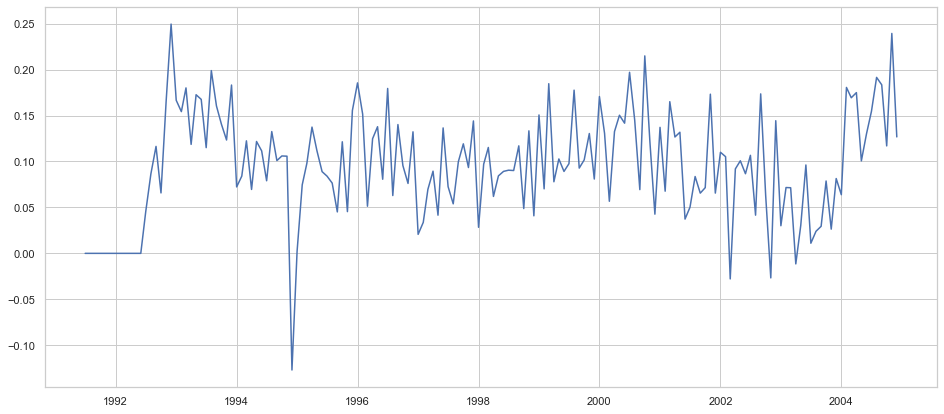

In [23]:
seasonal_data_differenced = log_train["y"] - log_train["y"].shift(12)
seasonal_data_differenced = seasonal_data_differenced.fillna(0)
seasonal_data_differenced = pd.DataFrame(seasonal_data_differenced)
stationarity_test(seasonal_data_differenced)

- As we can the the p-value has further reduced and is less than 0.05 and we can clearly see that the differencing has led to stationarity of data.

###  So Finally we model ARIMA(p, q, d) and finding out p, q, d values is the major task in building models using ARIMA class of models.

* Inorder to model we have to figure out what values does p q and d takes. From the               stationarity test, we have already obsevred that d = 1.
* To find out the values of P & q we need to look at the ACF and PACF plots.


### Autocorrelation Function (ACF): (useful to estimate q)
* It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

###  Partial Autocorrelation Function (PACF):(useful to estimate p)
* This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4

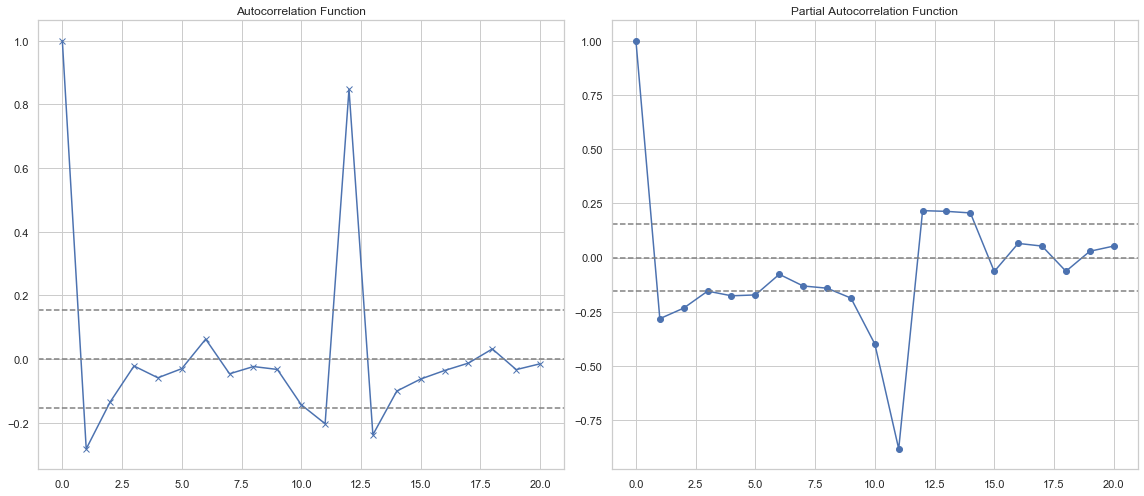

In [24]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(first_diff,nlags=20)
lag_pacf = pacf(first_diff,nlags=20,method='ols')

plt.figure(figsize=(16,7))
#plotting acf:

plt.subplot(121)
plt.plot(lag_acf,marker='x')
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plotting pacf:

plt.subplot(122)
plt.plot(lag_pacf,marker='o')
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

* q – The lag value where the ACF chart crosses the upper confidence interval for the first       time. If you notice closely, in this case q=1 and q=12 has very high positive correlation
* p – The lag value where the PACF chart crosses the upper confidence interval for the first     time. If you notice closely, in this case p=1 has +ve correlation and p=12 has high negative   correlation.

In [25]:
## AR Model p=1, d=1, q=0 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)

4.744465674705564


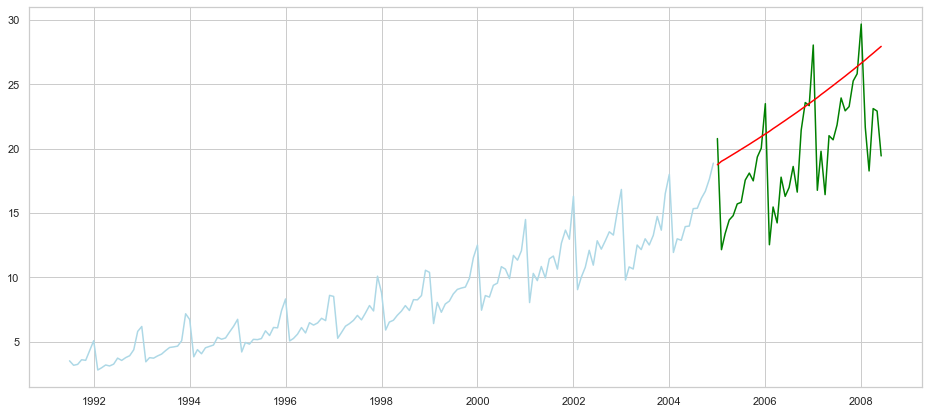

In [26]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")

## Forecasting 
pred = pd.DataFrame(results_AR.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

- RMSE: 4.74. We can do better than this. Lets check wat an MA model is giving

3.203396679544257


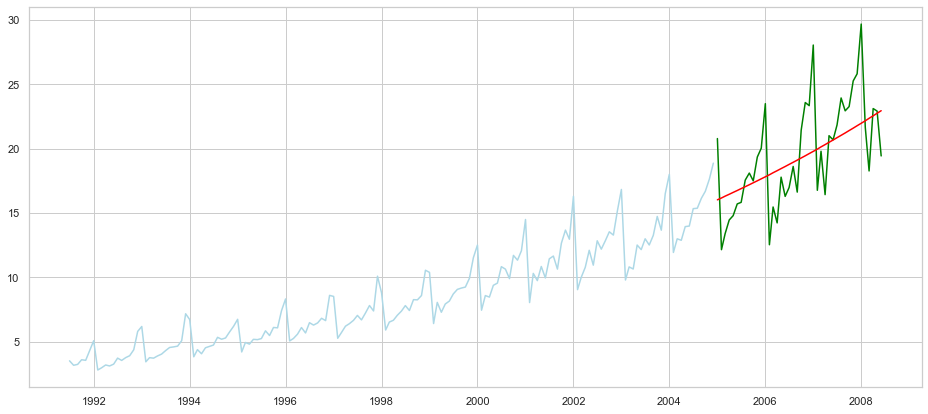

In [27]:
## MA Model p=0, d=1, q=1 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  


plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")

## Forecasting 
pred = pd.DataFrame(results_MA.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

- RMSE: 3.20. This is better than AR model. MA is better at smoothing the time-series graph and gives a linear trend while predicting.

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  161
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 103.570
Method:                       css-mle   S.D. of innovations              0.125
Date:                Thu, 19 Mar 2020   AIC                           -199.139
Time:                        21:39:33   BIC                           -186.814
Sample:                    08-01-1991   HQIC                          -194.135
                         - 12-01-2004                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.000     27.653      0.000       0.008       0.009
ar.L1.D.y      0.3060      0.076      4.040      0.000       0.158       0.454
ma.L1.D.y     -1.0000      0.016    -63.075      0.0

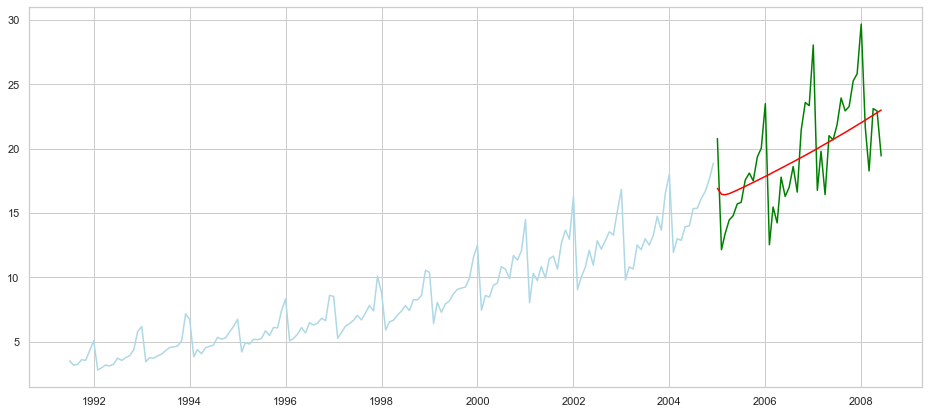

In [28]:
### Using both AR and MA with differencing 
## ARIMA Model p=1, d=1, q=1 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)
print(results_ARIMA.summary())


plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")

## Forecasting 
pred = pd.DataFrame(results_ARIMA.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

- RMSE: 3.18 is slightly better than the previous both MA model and much better than AR models.
- Akaike’s Information Criterion (AIC), which was useful in selecting predictors for regression, is also useful for determining the order of an ARIMA model. The less value, the better the model.

### Sesonal ARIMA models 
- ARIMA models are also capable of modelling a wide range of seasonal data.

Non Seasonal Part of the model:
\begin{align*}
(p, q, d)
\end{align*}

Seasonal part of the model:
\begin{align*}
(p, d, q)_{m}
\end{align*}

where  $m$=  number of observations per year.

### ACF/PACF
- The seasonal part of an AR or MA model will be seen in the seasonal lags of the PACF and ACF. For example, an ARIMA $(0,0,0)(0,0,1)_{12}$ model will show:  
    1) a spike at lag 12 in the ACF but no other significant spikes.  
    2) exponential decay in the seasonal lags of the PACF (i.e., at lags 12, 24, 36, …).  


- Similarly, an ARIMA$(0,0,0)(1,0,0)_{12}$ model will show:  
    1) exponential decay in the seasonal lags of the ACF.  
    2) a single significant spike at lag 12 in the PACF.  


- As modelled before, The $(p, d, q)$ will take values of (1, 1, 1) because we have seen a high spike the first lag of the ACF/PACF
- We will use $(p, d, q)$ will take values of (1, 1, 1). 
    - p=1 and q=1 because of the spikes in ACF/PACF plots
    - d=1 , The first order difference using seasonal difference has given us white noise. 

In [29]:
from statsmodels.tsa.statespace import sarimax
mod = sarimax.SARIMAX(log_train.y, trend='n', order=(1,1,1), seasonal_order=(1,1,1,12))
results = mod.fit(disp=-1)
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  162
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 244.622
Date:                            Thu, 19 Mar 2020   AIC                           -479.244
Time:                                    21:39:35   BIC                           -464.224
Sample:                                07-01-1991   HQIC                          -473.142
                                     - 12-01-2004                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1224      0.100     -1.219      0.223      -0.319       0.074
ma.L1         -0.7396      0.079   

1.6537399554814718


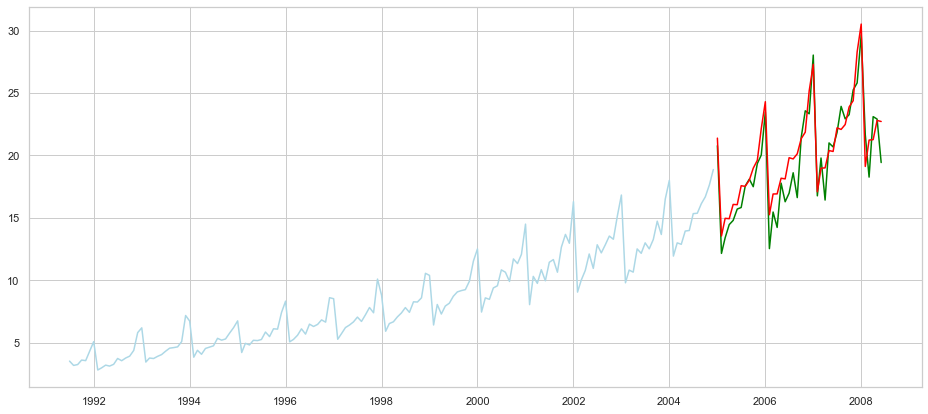

In [30]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")

## Forecasting 
pred = pd.DataFrame(results.forecast(len(x_test)))
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

- The SARIMA model has given an RMSE of 1.65, Which is better than any model those have been built till now.